In [3]:
# import libraries and modules 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

2024-06-04 23:21:33.934625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# load mnist data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) # change shape
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) # change shape

# normalize pixel to 0~1
train_images, test_images = train_images / 255.0, test_images / 255.0

# build model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1355 - accuracy: 0.9573
Epoch 2/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0432 - accuracy: 0.9863
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0327 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0194 - accuracy: 0.9934


1/1 [==============================] - 0s 40ms/step
predicted number= 9


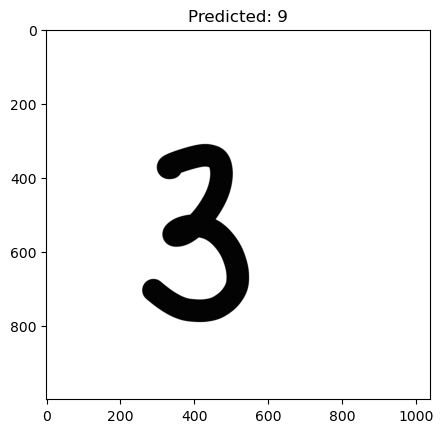

In [31]:

img_path = './3.jpeg'  # 직접 쓴 숫자 이미지 파일 경로

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype('float32') / 255
img = img.reshape(1, 28, 28, 1)

pred = model.predict(img, batch_size=1)
print("predicted number=", pred.argmax())

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted: {pred.argmax()}')
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 2. MNIST 데이터셋 로드 및 모델 학습 (이미 학습된 모델 로드)
# 이미 학습된 모델을 사용할 수 있도록 모델을 저장해 놓은 경우
# model = load_model('mnist_cnn_model.h5')

# 모델 학습이 필요할 경우
def load_and_train_model():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=200, verbose=2)
    model.save('mnist_cnn_model.h5')
    return model

model = load_and_train_model()

# 3. 직접 쓴 숫자 이미지 로드 및 전처리
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.astype('float32') / 255
    img = img.reshape(1, 28, 28, 1)
    return img

# 4. 모델을 사용하여 이미지 분류
def predict_image_class(model, img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return predicted_class


Epoch 1/5
300/300 - 19s - loss: 0.2476 - accuracy: 0.9311 - val_loss: 0.0741 - val_accuracy: 0.9785 - 19s/epoch - 64ms/step
Epoch 2/5
300/300 - 15s - loss: 0.0660 - accuracy: 0.9798 - val_loss: 0.0536 - val_accuracy: 0.9824 - 15s/epoch - 50ms/step
Epoch 3/5
300/300 - 18s - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0363 - val_accuracy: 0.9876 - 18s/epoch - 58ms/step
Epoch 4/5
300/300 - 16s - loss: 0.0369 - accuracy: 0.9890 - val_loss: 0.0321 - val_accuracy: 0.9894 - 16s/epoch - 52ms/step
Epoch 5/5
300/300 - 14s - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0312 - val_accuracy: 0.9888 - 14s/epoch - 47ms/step


1/1 [==============================] - 0s 48ms/step
The predicted class is: 0


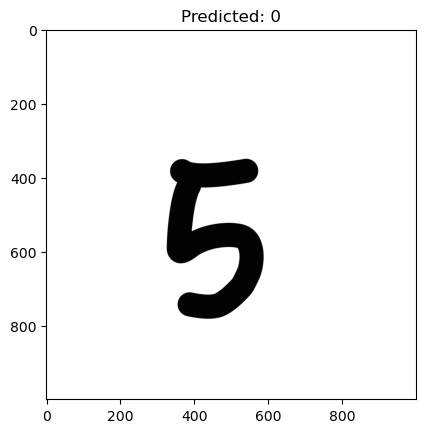

In [38]:
# 5. 결과 출력
img_path = './5.jpeg'  # 직접 쓴 숫자 이미지 파일 경로
predicted_class = predict_image_class(model, img_path)
print(f'The predicted class is: {predicted_class}')

# 이미지 출력
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.show()